<a href="https://colab.research.google.com/github/chengcheny/Keras_Python/blob/master/Save_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Save_model by Keras

## import libraries


In [0]:
import numpy as np
np.random.seed(1337) # for reproducibility
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
import matplotlib.pyplot as plt

## creat some data

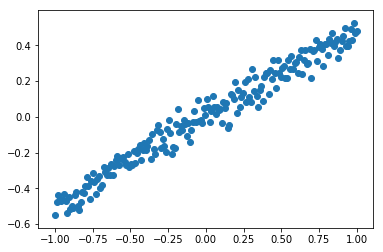

In [4]:
X = np.linspace(-1,1,200)
np.random.shuffle(X) # randomize the data
Y = 0.5 * X + np.random.normal(0,0.05,(200,))
plt.scatter(X,Y)  #plot data
plt.show()

## build the model

In [5]:
X_train, Y_train = X[:160], Y[:160] #train front 160 data points
X_test, Y_test = X[160:], Y[160:]  #test raw 40 data points
model = Sequential()
model.add(Dense(units=1,input_dim=1))

W0813 20:00:41.683597 140170259699584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0813 20:00:41.740336 140170259699584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0813 20:00:41.751566 140170259699584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



## active the model

In [6]:
model.compile(optimizer='sgd',loss='mse')

W0813 20:00:41.796484 140170259699584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



## training 

In [7]:
#
'''
print('Training---------')
for step in range(301):
  cost = model.train_on_batch(X_train,Y_train)
  if step % 100 ==0:
    print('train cost:', cost)
'''
cost = model.train_on_batch(X_train,Y_train)

W0813 20:00:42.019201 140170259699584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0813 20:00:42.035051 140170259699584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



## evalute


In [8]:
print('\nTesting-------')
cost = model.evaluate(X_test,Y_test,batch_size = 40)
print('test cost:',cost)
W, b= model.layers[0].get_weights()
print('Weights=',W,'\nbiases=',b)




Testing-------
40/40 [==============================] - 0s 600us/step
test cost: 0.004179663490504026
Weights= [[0.540418]] 
biases= [9.511698e-05]


##Plotting the prediciton

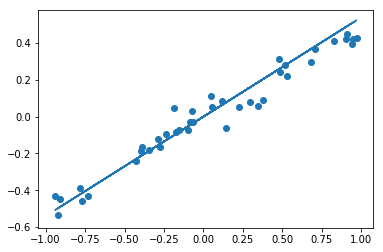

In [9]:
Y_pred = model.predict(X_test)
plt.scatter(X_test,Y_test)
plt.plot(X_test,Y_pred)
plt.show()

##Save

In [10]:
print('test before save:', model.predict(X_test[0:2]))
model.save('my_model.h5')
del model

test before save: [[-0.1275413 ]
 [ 0.20377025]]


##Load

In [11]:
model = load_model('my_model.h5')
print('test after load:', model.predict(X_test[0:2]))

test after load: [[-0.1275413 ]
 [ 0.20377025]]


In [0]:

# save and load weights
model.save_weights('my_model_weights.h5')
model.load_weights('my_model_weights.h5')
# save and load fresh network without trained weights
from keras.models import model_from_json
json_string = model.to_json()
model = model_from_json(json_string)


In [37]:
def absolute_file_path(path_fname):
        import os
        return os.path.abspath('path_fname')        
print("Absolute file path: ",absolute_file_path("my_model_weights.h5"))

Absolute file path:  /content/path_fname
